https://github.com/naleetwo/FinalProject/blob/master/Code/Juna/Yolov8/Final_Project_Check_BB_Acc.ipynb

# bbox 확인

- 이미지에 라벨링이 어떻게 되어있는지 확인

In [2]:
import os
from tqdm import tqdm
import json
import pandas as pd

In [3]:
# 경로
image_dir = "D:/study/symbol/240.심볼(로고) 생성 데이터/01.데이터/\
Training/01.원천데이터/TS_01.symbol_A"

## 라벨링 데이터 가져오기

In [4]:
# 경로
json_dir = "D:/study/symbol/240.심볼(로고) 생성 데이터/01.데이터/\
Training/02.라벨링데이터/TL_JSON_01.symbol_A"

# json 텍스트 받을 빈 list 준비
json_data_list = []

# 파일 중 .json 만
for file_name in tqdm(os.listdir(json_dir)):
    if file_name.endswith(".json"):
        file_path = os.path.join(json_dir, file_name)
        with open(file_path, "r", encoding="utf-8") as target_file:
            json_data_list.append(json.load(target_file))

100%|████████████████████████████████████████████████████████████████████████████| 5343/5343 [00:01<00:00, 3330.99it/s]


In [5]:
def json_data_to_dataframe(json_data):
    
    # 빈 데이터 프레임 준비
    df = pd.DataFrame()

    for i in tqdm(range(len(json_data))):
        
        # 반복하며 json 데이터의 키 개수 파악
        num_keys = len(json_data[i].keys())

        # 빈 dict
        row_data = {}

        for key, value in json_data[i].items():
            if isinstance(value, list):
                if len(value) > 0 and isinstance(value[0], dict):
                    
                    # 리스트 안에 딕셔너리가 있는 경우, 딕셔너리의 키들을 컬럼으로 사용
                    sub_dict = value[0]
                    for sub_key in sub_dict.keys():
                        row_data[sub_key] = [sub_dict[sub_key]]
                        
                else:
                    # 그 외의 경우, 리스트 그대로 사용
                    row_data[key] = value
                    
            elif isinstance(value, dict):
                
                # 딕셔너리 형식인 경우, 딕셔너리의 키들을 컬럼으로 사용
                # 예시  {bbox : [1, 1, 40, 40]}
                for sub_key in value.keys():
                    row_data[sub_key] = [value[sub_key]]

        # 데이터 프레임에 추가
        df = df.append(pd.DataFrame(row_data), ignore_index=True)

    return df

In [6]:
json_df = json_data_to_dataframe(json_data_list)

  0%|                                                                                         | 0/5343 [00:00<?, ?it/s]C:\Users\jhhwa\AppData\Local\Temp\ipykernel_13876\3384462087.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(row_data), ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████| 5343/5343 [00:16<00:00, 314.99it/s]


In [7]:
json_df.columns

Index(['description', 'version', 'year', 'contributor', 'date_created', 'id',
       'width', 'height', 'file_name', 'image_id', 'category_id', 'category',
       'bbox', 'area', 'name', 'type', 'class', 'applicant', 'nation', 'shape',
       'design_keyword', 'url'],
      dtype='object')

In [8]:
# bbox 좌표 확인
json_df.bbox[0]

[91, 157, 808, 718]

In [9]:
json_df.bbox[1]

[239, 99, 748, 820]

In [10]:
print(json_df.width[0], json_df.height[0])

1024 1024


## 이미지 이름

In [11]:
image_names = os.listdir("D:/study/symbol/240.심볼(로고) 생성 데이터/01.데이터/Training/01.원천데이터/TS_01.symbol_A")

## 이미지 위에 bbox 그리기

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

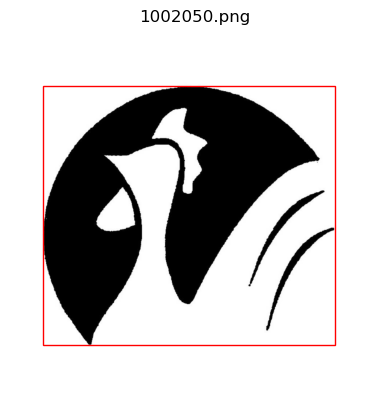

  5%|████▏                                                                              | 1/20 [00:00<00:03,  5.80it/s]

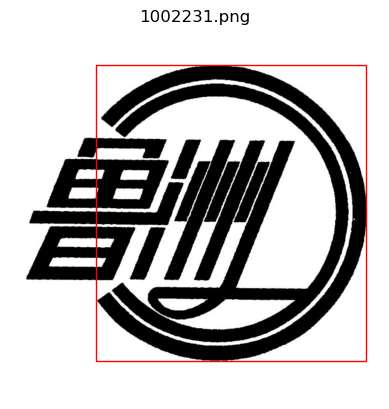

 10%|████████▎                                                                          | 2/20 [00:00<00:06,  2.90it/s]

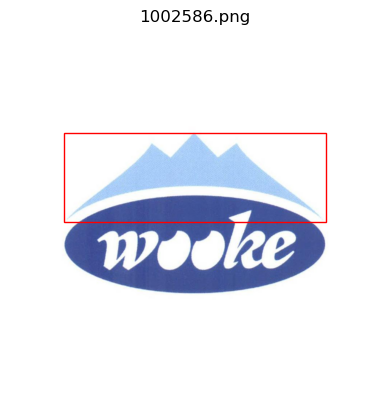

 15%|████████████▍                                                                      | 3/20 [00:00<00:04,  3.55it/s]

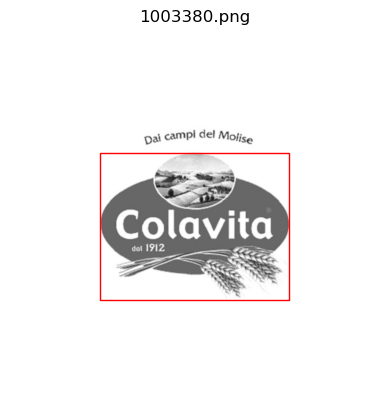

 20%|████████████████▌                                                                  | 4/20 [00:01<00:03,  4.27it/s]

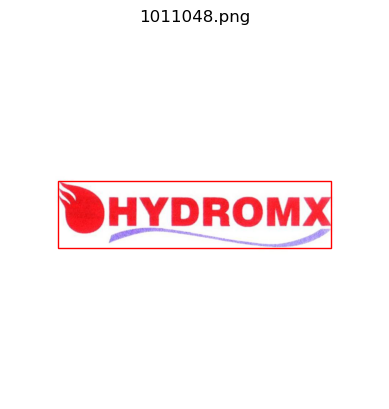

 25%|████████████████████▊                                                              | 5/20 [00:01<00:03,  4.76it/s]

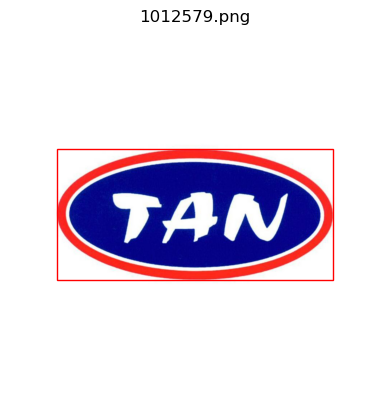

 30%|████████████████████████▉                                                          | 6/20 [00:01<00:03,  4.44it/s]

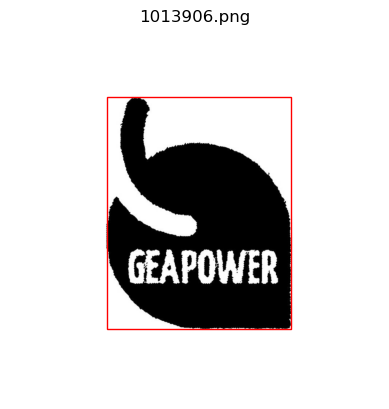

 35%|█████████████████████████████                                                      | 7/20 [00:01<00:02,  4.53it/s]

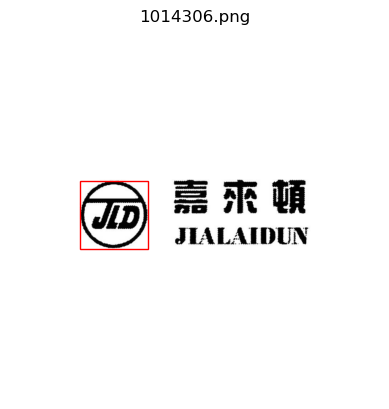

 40%|█████████████████████████████████▏                                                 | 8/20 [00:01<00:02,  4.70it/s]

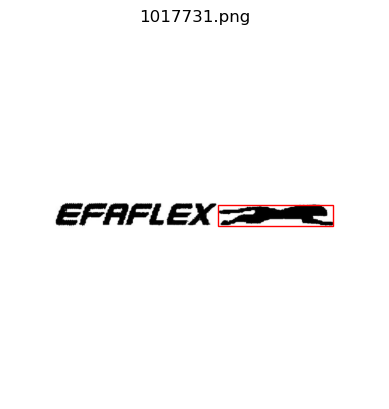

 45%|█████████████████████████████████████▎                                             | 9/20 [00:02<00:02,  4.91it/s]

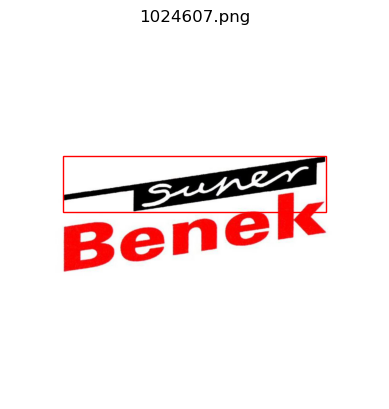

 50%|█████████████████████████████████████████                                         | 10/20 [00:02<00:02,  4.92it/s]

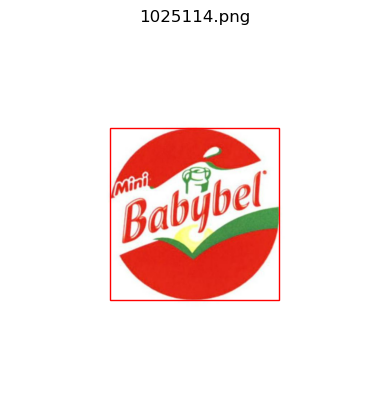

 55%|█████████████████████████████████████████████                                     | 11/20 [00:02<00:01,  5.09it/s]

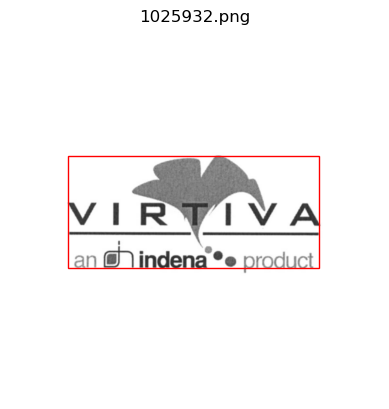

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:02<00:01,  5.14it/s]

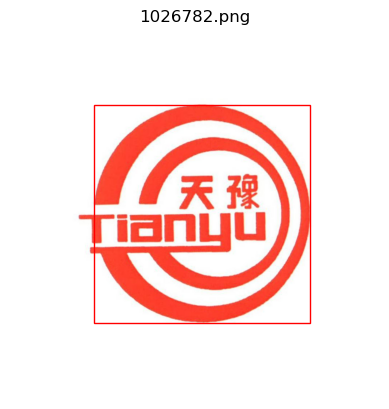

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:02<00:01,  5.19it/s]

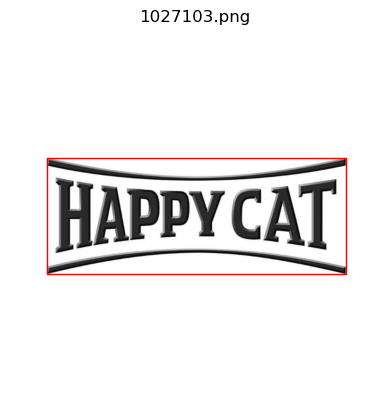

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:02<00:01,  5.16it/s]

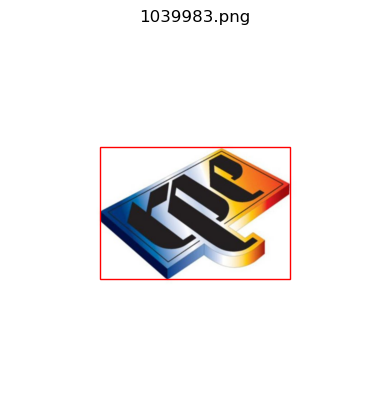

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:03<00:01,  4.98it/s]

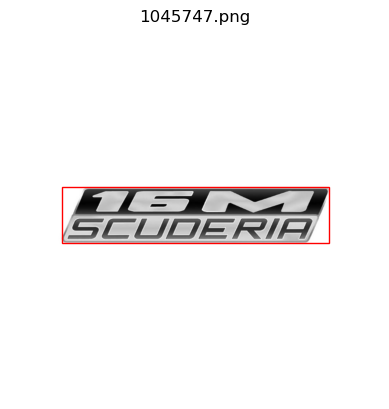

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:03<00:00,  4.91it/s]

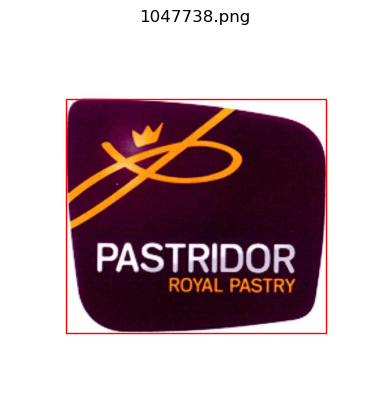

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:03<00:00,  4.59it/s]

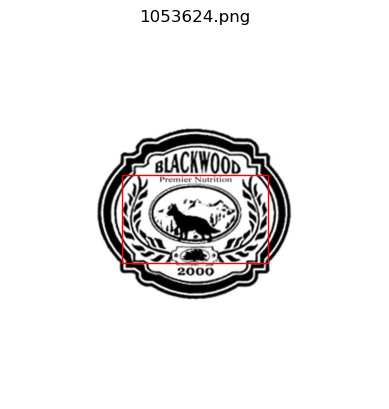

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:03<00:00,  4.91it/s]

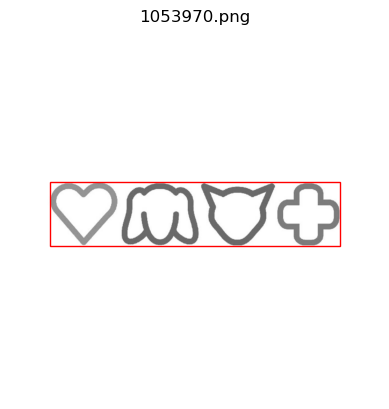

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:04<00:00,  5.01it/s]

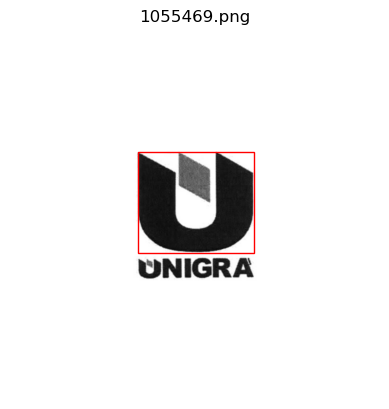

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.75it/s]


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for i in tqdm(range(20)):
    image_path = os.path.join(image_dir, image_names[i])
    image = Image.open(image_path)

    box_coordinates = [json_df.bbox[i]]
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box in box_coordinates:
        x, y, width, height = box
        
        rect = patches.Rectangle((x, y), width, height, linewidth=1,
                                 edgecolor="r", facecolor="none")
        ax.add_patch(rect)        

#     save_path = os.path.join("C:/juna27/PythonWork/AI/data/tomato_label/시설작물진단/image_bb/질병", image_names[i])
#     plt.savefig(save_path)
    plt.title(image_names[i])
    plt.axis("off")
    plt.show()